#Format all images and save in file

In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


from data_fixing import *
from train_model import *
import tensorflow as tf


In [2]:
import gc

gc.collect()

43

In [3]:
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())
print(tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    # Enable memory growth for the first GPU
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU devices found.")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
2.10.0


In [4]:
# format_and_label_data(folder_dir='../images/all_gen_1_images/', grayscale=False)  # Saves as "pokemon_rgb_128x128.npz"
#

In [5]:
data = np.load('./pokemon_rgb_non_norm128x128.npz')
images = data['images']
print(f"Loaded images with shape: {images.shape}")
labels = data['labels']
print(f"Loaded labels with shape: {labels.shape}")


Loaded images with shape: (16531, 128, 128, 3)
Loaded labels with shape: (16531,)


In [6]:
# Count occurrences of each unique label
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Find the Pokémon with the least amount of labels
min_label_index = np.argmin(label_counts)
min_label = unique_labels[min_label_index]
min_label_count = label_counts[min_label_index]

print(f"Pokemon with the least amount of labels: {min_label}")
print(f"Number of occurrences: {min_label_count}")

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=1239337)

Pokemon with the least amount of labels: 82
Number of occurrences: 45


In [7]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming y_train contains the true class labels for your training set
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))


num_classes = np.unique(labels).size
print(num_classes)
print(class_weight_dict)

143
{0: 2.4520025429116337, 1: 1.44493006993007, 2: 1.2260012714558168, 3: 0.9408846966986502, 4: 1.4195804195804196, 5: 1.371459049425151, 6: 1.2643138111888113, 7: 0.8891877353415815, 8: 0.7706293706293706, 9: 0.38167964111360336, 10: 0.9632867132867133, 11: 0.90916948220319, 12: 1.0646853146853146, 13: 1.0508582326764144, 14: 0.41925432080872493, 15: 0.8173341809705446, 16: 1.2643138111888113, 17: 1.078881118881119, 18: 1.1396631537476607, 19: 0.9632867132867133, 20: 1.0508582326764144, 21: 1.2643138111888113, 22: 1.4984459984459984, 23: 1.3951048951048952, 24: 1.371459049425151, 25: 0.9748925773022159, 26: 0.8091608391608391, 27: 1.0508582326764144, 28: 1.155944055944056, 29: 0.9408846966986502, 30: 0.8700654184525152, 31: 1.0114510489510489, 32: 0.9748925773022159, 33: 2.4520025429116337, 34: 1.0934605934605934, 35: 0.7289737289737289, 36: 0.9748925773022159, 37: 0.8341864321245764, 38: 0.6799670917317976, 39: 0.8891877353415815, 40: 0.8091608391608391, 41: 1.2843822843822843, 42:

In [8]:


model = create_CNN_model(dropout=0.39,grayscale=False,image_size=128, num_classes=num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                        

In [10]:
model = CNN_fit_train(model, X_train,y_train,X_test,y_test,num_epochs=100,num_batch=32, class_weights=class_weight_dict, save_path='./models/all_gen_1_rgb_v4_relu_test.keras', datagen=True)

Epoch 1/100
362/362 [==============================] - ETA: 0s - loss: 0.7697 - accuracy: 0.7758
Epoch 1: val_loss improved from inf to 0.89976, saving model to ./models\all_gen_1_rgb_v4_relu_test.keras
362/362 [==============================] - 46s 111ms/step - loss: 0.7697 - accuracy: 0.7758 - val_loss: 0.8998 - val_accuracy: 0.7806
Epoch 2/100
362/362 [==============================] - ETA: 0s - loss: 0.7518 - accuracy: 0.7829
Epoch 2: val_loss did not improve from 0.89976
362/362 [==============================] - 36s 101ms/step - loss: 0.7518 - accuracy: 0.7829 - val_loss: 0.9776 - val_accuracy: 0.7635
Epoch 3/100
362/362 [==============================] - ETA: 0s - loss: 0.7449 - accuracy: 0.7821
Epoch 3: val_loss did not improve from 0.89976
362/362 [==============================] - 37s 101ms/step - loss: 0.7449 - accuracy: 0.7821 - val_loss: 0.9353 - val_accuracy: 0.7669
Epoch 4/100
362/362 [==============================] - ETA: 0s - loss: 0.7292 - accuracy: 0.7843
Epoch 4: v

In [18]:
model = tf.keras.models.load_model('./models/all_gen_1_rgb_v3_added_weights.keras')

155/155 [==============================] - 3s 7ms/step


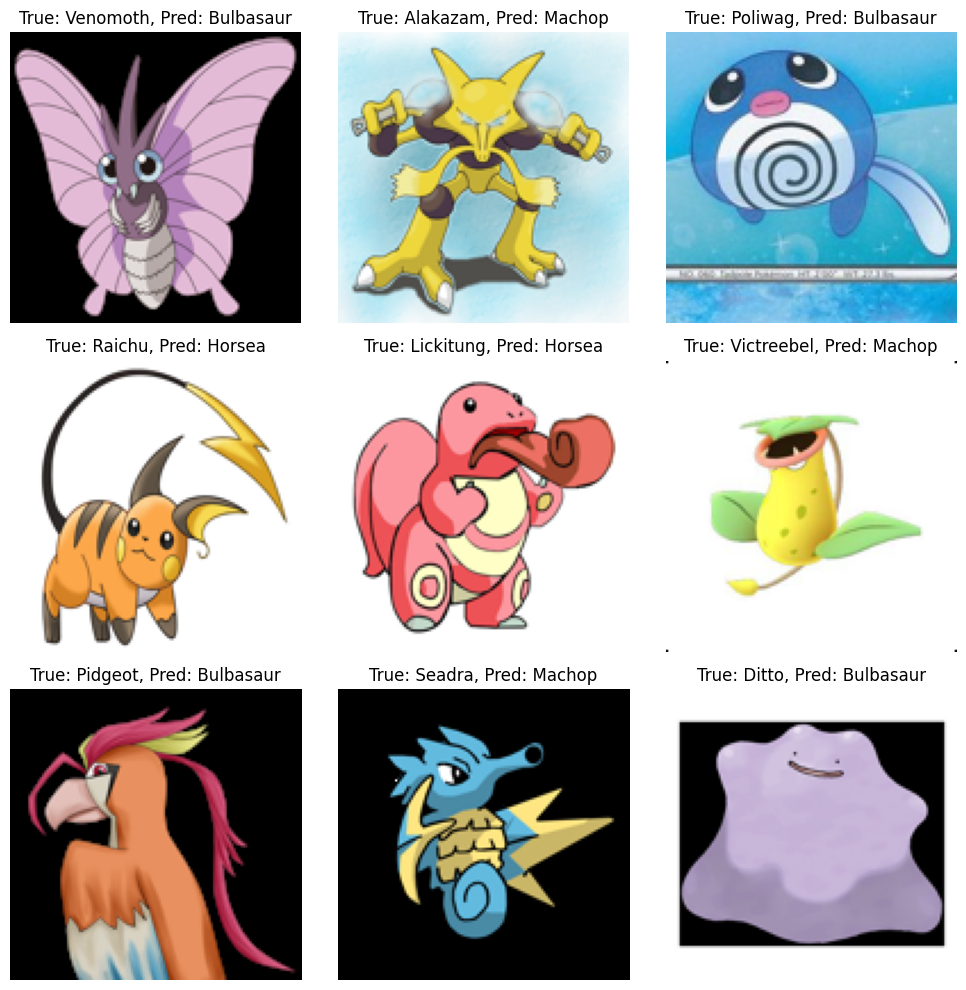

In [ ]:
import math
import matplotlib.pyplot as plt
index_to_pokemon = {0: 'Abra', 1: 'Aerodactyl', 2: 'Alakazam', 3: 'Arbok', 4: 'Arcanine', 5: 'Articuno', 6: 'Beedrill', 7: 'Bellsprout', 8: 'Blastoise', 9: 'Bulbasaur', 10: 'Butterfree', 11: 'Caterpie', 12: 'Chansey', 13: 'Charizard', 14: 'Charmander', 15: 'Charmeleon', 16: 'Clefable', 17: 'Clefairy', 18: 'Cloyster', 19: 'Cubone', 20: 'Dewgong', 21: 'Diglett', 22: 'Ditto', 23: 'Dodrio', 24: 'Doduo', 25: 'Dragonair', 26: 'Dragonite', 27: 'Dratini', 28: 'Drowzee', 29: 'Dugtrio', 30: 'Eevee', 31: 'Ekans', 32: 'Electabuzz', 33: 'Electrode', 34: 'Exeggcute', 35: 'Exeggutor', 36: 'Farfetchd', 37: 'Fearow', 38: 'Flareon', 39: 'Gastly', 40: 'Gengar', 41: 'Geodude', 42: 'Gloom', 43: 'Golbat', 44: 'Goldeen', 45: 'Golduck', 46: 'Graveler', 47: 'Grimer', 48: 'Growlithe', 49: 'Gyarados', 50: 'Haunter', 51: 'Hitmonchan', 52: 'Hitmonlee', 53: 'Horsea', 54: 'Hypno', 55: 'Ivysaur', 56: 'Jigglypuff', 57: 'Jolteon', 58: 'Jynx', 59: 'Kabutops', 60: 'Kadabra', 61: 'Kakuna', 62: 'Kangaskhan', 63: 'Kingler', 64: 'Koffing', 65: 'Lapras', 66: 'Lickitung', 67: 'Machamp', 68: 'Machoke', 69: 'Machop', 70: 'Magikarp', 71: 'Magmar', 72: 'Magnemite', 73: 'Magneton', 74: 'Mankey', 75: 'Marowak', 76: 'Meowth', 77: 'Metapod', 78: 'Mew', 79: 'Mewtwo', 80: 'Moltres', 81: 'Mr. Mime', 82: 'MrMime', 83: 'Nidoking', 84: 'Nidoqueen', 85: 'Nidorina', 86: 'Nidorino', 87: 'Ninetales', 88: 'Oddish', 89: 'Omanyte', 90: 'Omastar', 91: 'Parasect', 92: 'Pidgeot', 93: 'Pidgeotto', 94: 'Pidgey', 95: 'Pikachu', 96: 'Pinsir', 97: 'Poliwag', 98: 'Poliwhirl', 99: 'Poliwrath', 100: 'Ponyta', 101: 'Porygon', 102: 'Primeape', 103: 'Psyduck', 104: 'Raichu', 105: 'Rapidash', 106: 'Raticate', 107: 'Rattata', 108: 'Rhydon', 109: 'Rhyhorn', 110: 'Sandshrew', 111: 'Sandslash', 112: 'Scyther', 113: 'Seadra', 114: 'Seaking', 115: 'Seel', 116: 'Shellder', 117: 'Slowbro', 118: 'Slowpoke', 119: 'Snorlax', 120: 'Spearow', 121: 'Squirtle', 122: 'Starmie', 123: 'Staryu', 124: 'Tangela', 125: 'Tauros', 126: 'Tentacool', 127: 'Tentacruel', 128: 'Vaporeon', 129: 'Venomoth', 130: 'Venonat', 131: 'Venusaur', 132: 'Victreebel', 133: 'Vileplume', 134: 'Voltorb', 135: 'Vulpix', 136: 'Wartortle', 137: 'Weedle', 138: 'Weepinbell', 139: 'Weezing', 140: 'Wigglytuff', 141: 'Zapdos', 142: 'Zubat'}
predictions = model.predict(X_test)  

predicted_classes = np.argmax(predictions, axis=1)  

true_classes = y_test

incorrect_indices = np.where(predicted_classes != true_classes)[0]


# Visualize the incorrectly predicted images
num_images_to_show = 9 

num_columns = 3  
num_rows = math.ceil(num_images_to_show / num_columns)

# Create a figure for plotting
plt.figure(figsize=(10, 10))

for i, idx in enumerate(incorrect_indices[:num_images_to_show]):
    plt.subplot(num_rows, num_columns, i + 1)
    
    img = X_test[idx+66]  
    true_label = y_test[idx+66] 
    predicted_label = np.argmax(predictions[idx+66]) 
    
    # Display the image
    plt.imshow(img)
    plt.title(f"True: {index_to_pokemon[true_label]}, Pred: {index_to_pokemon[predicted_label]}")
    plt.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [20]:
print(predicted_classes)
# print(y_test)

[69  9  9 ... 69  9 69]


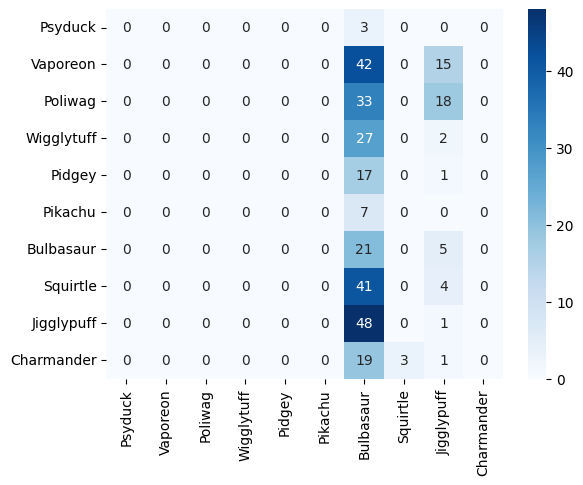

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# y_pred = model.predict(X_test) 
# y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, predicted_classes)
# Sum up incorrect predictions for each class
incorrect_counts = np.sum(cm, axis=1) - np.diag(cm)

# Get indices of the top 10 misclassified Pokémon
top_misclassified_indices = np.argsort(incorrect_counts)[-10:]

# Filter the confusion matrix to show only the top misclassifications
cm_top = cm[top_misclassified_indices][:, top_misclassified_indices]
top_labels = [index_to_pokemon[i] for i in top_misclassified_indices]

# Plot the heatmap
sns.heatmap(cm_top, annot=True, fmt="d", cmap="Blues", xticklabels=top_labels, yticklabels=top_labels)
plt.show()